# 球面上の点の類似度

In [13]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.style.use('ggplot')

In [4]:
import pandas as pd


In [5]:
random_state = 12345

In [1]:
'''
# プロット
cmap = plt.cm.gist_rainbow

plt.figure(figsize=(10, 8))
plt.title('散布図(「{}」に対する類似度で色付け)'.format(target_name))

plt.scatter(features[:, 0], features[:, 1], c=similarity_target, cmap=cmap, alpha=0.5)
plt.colorbar()

feat_target = features[vocab.index(target_name)]
plt.plot(feat_target[0], feat_target[1], c='blue', marker='*', markersize=15, label='target')

plt.legend()
plt.show()
'''

"\n# プロット\ncmap = plt.cm.gist_rainbow\n\nplt.figure(figsize=(10, 8))\nplt.title('散布図(「{}」に対する類似度で色付け)'.format(target_name))\n\nplt.scatter(features[:, 0], features[:, 1], c=similarity_target, cmap=cmap, alpha=0.5)\nplt.colorbar()\n\nfeat_target = features[vocab.index(target_name)]\nplt.plot(feat_target[0], feat_target[1], c='blue', marker='*', markersize=15, label='target')\n\nplt.legend()\nplt.show()\n"

In [31]:
# 球座標⇒デカルト座標
n_theta = 50
theta = np.linspace(0, np.pi, n_theta)

n_phi = 50
phi = np.linspace(0, 2*np.pi, n_phi)

r = [1.,]

data = []

for _r in r:
    for _theta in theta:
        for _phi in phi:
            x = _r * np.sin(_theta) * np.cos(_phi)
            y = _r * np.sin(_theta) * np.sin(_phi)
            z = _r * np.cos(_theta)
            data.append(np.array([x, y, z]))
            
data = np.array(data)

In [32]:
data.shape

(2500, 3)

In [33]:
X, Y, Z = data[:,0], data[:,1], data[:,2]

In [34]:
from mpl_toolkits.mplot3d import Axes3D

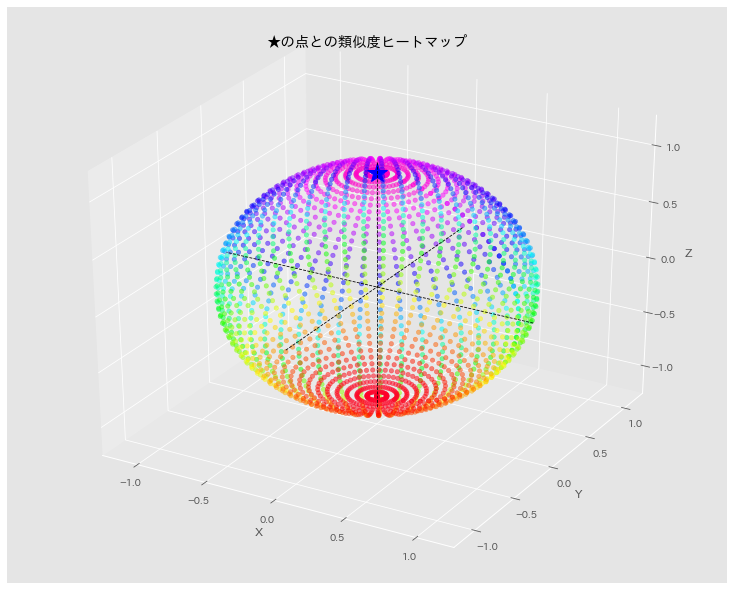

In [50]:
# プロット
cmap = plt.cm.gist_rainbow

fig = plt.figure(figsize=(10, 8))
#    ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.set_title('★の点との類似度ヒートマップ')

ax.scatter(X, Y, Z, c=Z, cmap=cmap, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

target = np.array([[0., 0., 1.,],])
ax.plot(target[:,0], target[:,1], target[:,2], color='blue', marker='*', ms=20)
#    ax.plot(feat_target[0], feat_target[1], feat_target[2], c='blue', marker='*')  # NG
#    plt.annotate(target_name, xy=feat_target)

_len = 1.1
color = 'black'
linewidth = 0.8

ax.plot([_len, -_len,], [0., 0.,], [0., 0.,], '--', color=color, linewidth=linewidth)  # X軸
ax.plot([0., 0.,], [_len, -_len,], [0., 0.,], '--', color=color, linewidth=linewidth)  # Y軸
ax.plot([0., 0.,], [0., 0.,], [_len, -_len,], '--', color=color, linewidth=linewidth)  # Y軸

#    plt.legend()
plt.savefig('similarity_heatmap.png')
plt.show()